<a href="https://colab.research.google.com/github/SaulPichardo/python_THC/blob/main/Proyecto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de las ejecuciones en Estados Unidos.

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

link='https://github.com/mike1502/HerramientasComputacionales/blob/main/Pandas/Bases%20de%20datos/EXECUTION_USA.csv'
code='?raw=true'
url=link+code
df=pd.read_csv(url,sep=',',index_col=1)

df.head()

,Date,Age,Sex,Race,Crime,Victim Count,Victim Sex,Victim Race,County,State,Region,Method,Juvenile,Volunteer,Federal,Foreign National
Name,,,,,,,,,,,,,,,,
Gary Gilmore,01/17/1977,36,Male,White,Murder,1,Male,White,Utah,UT,West,Firing Squad,No,Yes,No,No
John Spenkelink,05/25/1979,30,Male,White,Murder,1,Male,White,Leon,FL,South,Electrocution,No,No,No,No
Jesse Bishop,10/22/1979,46,Male,White,Murder,1,Male,White,Clark,NV,West,Gas Chamber,No,Yes,No,No
Steven Judy,03/09/1981,24,Male,White,Murder,4,"2 Male, 2 Female",White,Marion,IN,Midwest,Electrocution,No,Yes,No,No
Frank Coppola,08/10/1982,38,Male,White,Murder,1,Male,White,Newport News City,VA,South,Electrocution,No,Yes,No,No


In [4]:
df.describe()

,Age,Victim Count
count,1442.000000,1442.000000
mean,41.479889,1.537448
std,9.471676,4.495852
min,22.000000,1.000000
25%,34.000000,1.000000
50%,40.000000,1.000000
75%,47.000000,1.750000
max,77.000000,168.000000


In [8]:
fecha=df.groupby('Date').size().reset_index(name='fecha')
fecha=fecha.sort_values(by='fecha',ascending=False)
fecha

,Date,fecha
1241,12/09/1999,4
35,01/13/1999,3
18,01/08/1997,3
193,02/24/1999,3
262,03/15/2000,3
...,...,...
1276,12/15/1999,1
1261,12/12/1984,1
1262,12/12/1995,1
1263,12/12/1996,1


In [10]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
df_sorted_by_year = df.sort_values(by='Year')
print(df_sorted_by_year.head())

                       Date  Age   Sex   Race   Crime  Victim Count  \
Name                                                                  
Gary Gilmore     01/17/1977   36  Male  White  Murder             1   
John Spenkelink  05/25/1979   30  Male  White  Murder             1   
Jesse Bishop     10/22/1979   46  Male  White  Murder             1   
Steven Judy      03/09/1981   24  Male  White  Murder             4   
Charlie Brooks   12/07/1982   40  Male  Black  Murder             1   

                       Victim Sex Victim Race   County State   Region  \
Name                                                                    
Gary Gilmore                 Male       White     Utah    UT     West   
John Spenkelink              Male       White     Leon    FL    South   
Jesse Bishop                 Male       White    Clark    NV     West   
Steven Judy      2 Male, 2 Female       White   Marion    IN  Midwest   
Charlie Brooks               Male       White  Tarrant    TX    

In [15]:
años=df.groupby('Year').size().reset_index(name='ejecuciones')
años=años.sort_values(by='ejecuciones',ascending=False)
años

,Year,ejecuciones
20,1999,98
21,2000,85
18,1997,74
23,2002,71
19,1998,68
22,2001,66
24,2003,65
26,2005,60
25,2004,59
16,1995,56


Text(0.5, 1.0, 'Ejecuciones por año')

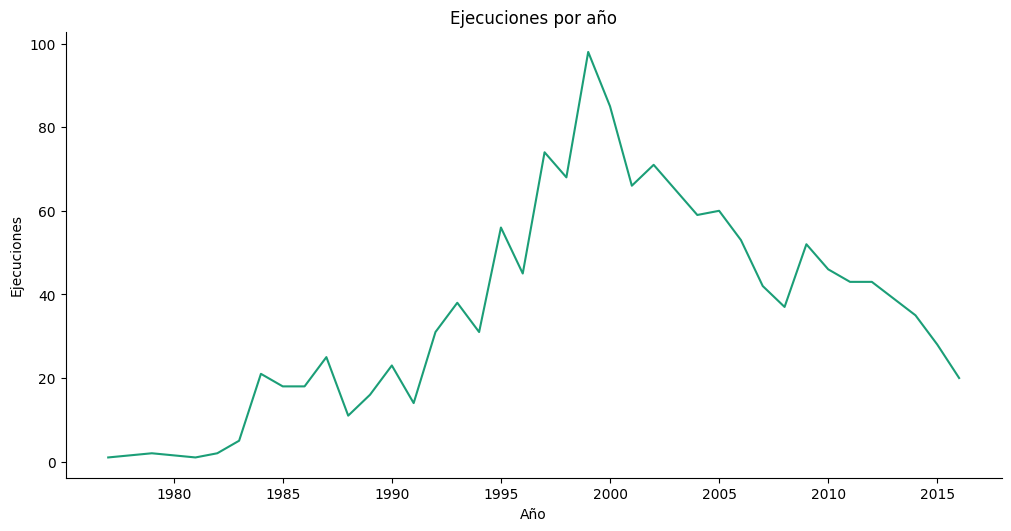

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['ejecuciones']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = años.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Año')
_ = plt.ylabel('Ejecuciones')
plt.title('Ejecuciones por año')

In [17]:
sexo=df.groupby('Sex').size().reset_index(name='sexo')
sexo=sexo.sort_values(by='sexo',ascending=False)
sexo

,Sex,sexo
1,Male,1426
0,Female,16


from matplotlib import pyplot as plt
sexo['sexo'].plot(kind='hist', bins=20, title='sexo')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
sexo.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sexo['sexo'].plot(kind='line', figsize=(8, 4), title='sexo')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(sexo['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(sexo, x='sexo', y='Sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

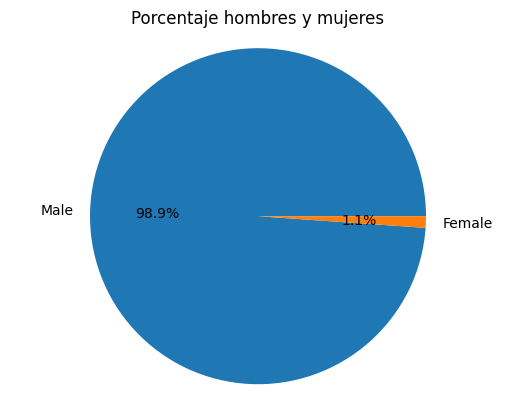

In [22]:
plt.pie(sexo['sexo'],labels=sexo['Sex'],autopct='%1.1f%%')
plt.axis('equal')
plt.title('Porcentaje hombres y mujeres')
plt.savefig('Porcentaje hombres y mujeres',dpi=300,format='png')
plt.show()

In [24]:
crimen=df.groupby('Crime').size().reset_index(name='crimen')
crimen=crimen.sort_values(by='crimen',ascending=False)
crimen

,Crime,crimen
0,Murder,1442


In [32]:
Victimas=df.groupby('Victim Count').size().reset_index(name='Victimas')
Victimas=Victimas.sort_values(by='Victimas',ascending=False)
print(Victimas[['Name', 'Victim Count']].head()) #no se logró obtener las victimas por nombre

KeyError: "['Name'] not in index"

In [33]:
Raza_Victimas=df.groupby('Victim Race').size().reset_index(name='Raza_Victimas')
Raza_Victimas=Raza_Victimas.sort_values(by='Raza_Victimas',ascending=False)
Raza_Victimas

,Victim Race,Raza_Victimas
21,White,1087
18,Black,192
19,Latino,94
17,Asian,22
0,"1 White, 1 Black",8
1,"1 White, 1 Latino",8
8,"2 White, 1 Black",3
20,Native American,3
3,"1 White, 2 Latino",3
2,"1 White, 2 Black",2


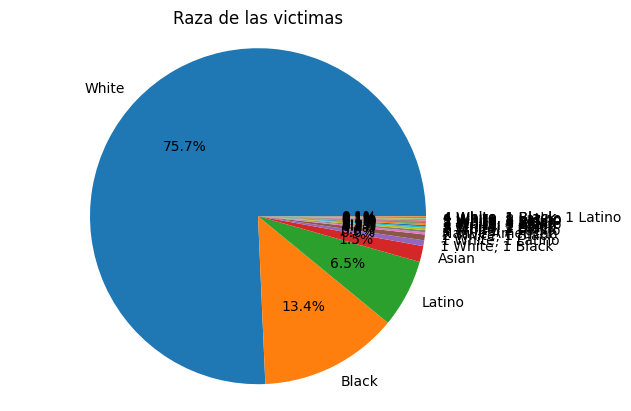

In [37]:
plt.pie(Raza_Victimas['Raza_Victimas'],labels=Raza_Victimas['Victim Race'],autopct='%1.1f%%')
plt.axis('equal')
plt.title('Raza de las victimas')
plt.savefig('Raza de las victimas',dpi=300,format='png')
plt.show()

In [36]:
Ej_Por_Estado=df.groupby('State').size().reset_index(name='Ej_Por_Estado')
Ej_Por_Estado=Ej_Por_Estado.sort_values(by='Ej_Por_Estado',ascending=False)
Ej_Por_Estado

,State,Ej_Por_Estado
30,TX,538
24,OK,112
32,VA,111
8,FL,92
16,MO,87
9,GA,69
0,AL,58
23,OH,53
19,NC,43
27,SC,43


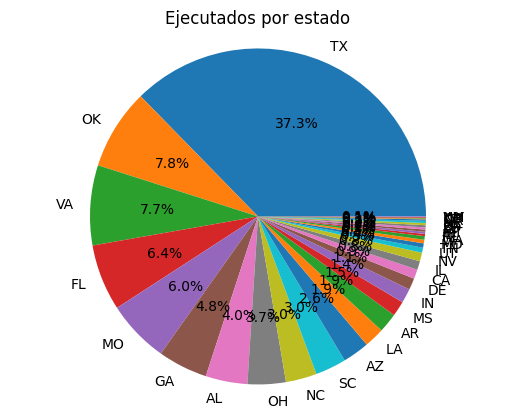

In [38]:
plt.pie(Ej_Por_Estado['Ej_Por_Estado'],labels=Ej_Por_Estado['State'],autopct='%1.1f%%')
plt.axis('equal')
plt.title('Ejecutados por estado')
plt.savefig('Ejecutados por estado',dpi=300,format='png')
plt.show()

In [39]:
Metodo_Ej=df.groupby('Method').size().reset_index(name='Metodo_Ej')
Metodo_Ej=Metodo_Ej.sort_values(by='Metodo_Ej',ascending=False)
Metodo_Ej

,Method,Metodo_Ej
4,Lethal Injection,1267
0,Electrocution,158
2,Gas Chamber,11
1,Firing Squad,3
3,Hanging,3


from matplotlib import pyplot as plt
Metodo_Ej['Metodo_Ej'].plot(kind='hist', bins=20, title='Metodo_Ej')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
Metodo_Ej.groupby('Method').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Metodo_Ej['Metodo_Ej'].plot(kind='line', figsize=(8, 4), title='Metodo_Ej')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(Metodo_Ej['Method'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(Metodo_Ej, x='Metodo_Ej', y='Method', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

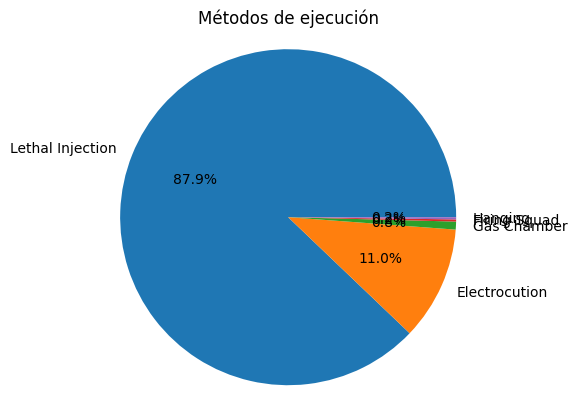

In [40]:
plt.pie(Metodo_Ej['Metodo_Ej'],labels=Metodo_Ej['Method'],autopct='%1.1f%%')
plt.axis('equal')
plt.title('Métodos de ejecución')
plt.savefig('Métodos de ejecución',dpi=300,format='png')
plt.show()